<a href="https://colab.research.google.com/github/chris-hendrix/lumped-mass-stick-modeler/blob/main/toy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Tuned-Mass Damper Toy

<h2> Setup

<h3> Import packages

In [1]:
# check if in colab
IN_COLAB = False
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from lumped_mass_stick_modeler import LumpedMassStickModel


if IN_COLAB:
    from IPython.display import HTML
else:
    import ipympl
    %matplotlib ipympl
    %load_ext autoreload
    %reload_ext autoreload
    %autoreload 2


<h2> Simple example

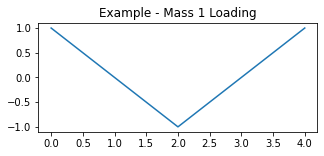

In [4]:
# define loading with 1 sec time step
dt = 1
loadings = [
    [1,0,-1,0,1],
    [0,0,0,0,0]
]
plt.figure(figsize=(5,2))
plt.title('Example - Mass 1 Loading')
plt.plot(loadings[0])

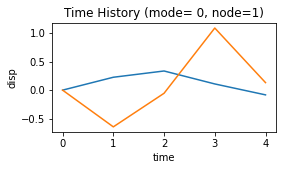

In [5]:
# create 2DOF model with m=1, k=1, and c=1
example = LumpedMassStickModel([1,1],[1,1],[1,1],loadings, timestep=dt, name='Example')

# plot first mass' first mode displacements
fig, ax = plt.subplots(figsize=(4,2))
example.get_time_history_plt(ax, node=0, motion='disp')
example.get_time_history_plt(ax, node=1, motion='disp')
plt.show()

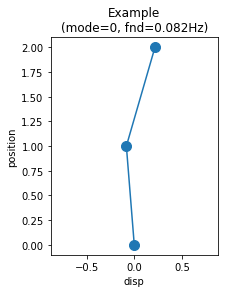

In [6]:
fig, axs = plt.subplots(1,1, figsize=(3,4))
ani = example.get_animation(fig=fig,ax=axs)
if IN_COLAB:
    HTML(ani.to_html5_video())
else:
    plt.show()

<h2> Define loading paramaters

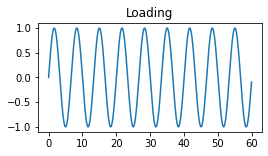

In [7]:
# time paramaters
tmax = 60
dt = 0.1
steps = int(tmax/dt)
t = np.arange(steps) * dt

# load paramaters
fp = 0.15
psin = 1*np.sin(2*math.pi*fp*t)
pzero = 0*t

# excite the first mass
p_mat = [psin]
fig, ax = plt.subplots(1,1, figsize=(4,2))
ax.set_title('Loading')
plt.plot(t, psin)
plt.show()

<h2> Control model

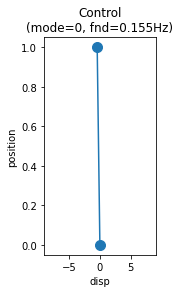

In [8]:
# model input
m = 1
k = 1
xi = 0.05
wn = math.sqrt(k/m)
c = 2*xi*wn*m

# define model
ctrl = LumpedMassStickModel([m], [k], [c], [psin], dt, name='Control')

# plot anaimation
fig, axs = plt.subplots(1,1, figsize=(2,4))
ani = ctrl.get_animation(fig=fig,ax=axs,mode=0)
if IN_COLAB:
    HTML(ani.to_html5_video())
else:
    plt.show()

<h2> Tuned mass damper

In [9]:
md = 0.05*m
mbar = md/m
fopt = math.sqrt(1-.5*mbar)/(1+mbar)
xidopt = math.sqrt(
    mbar*(3-math.sqrt(.5*mbar))/
    (8*(1+mbar)*(1-.05*mbar))
)
kd = mbar*fopt**2*k
wnd = math.sqrt(kd/md)
cd = 2*xidopt*wnd*md

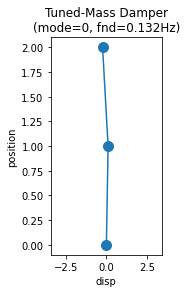

In [10]:
tmd = LumpedMassStickModel([m, md], [k, kd], [c, cd], [psin, pzero], dt, name="Tuned-Mass Damper")

# plot anaimation
fig, axs = plt.subplots(1,1, figsize=(2,4))
ani = tmd.get_animation(mode=0,fig=fig,ax=axs)
if IN_COLAB:
    HTML(ani.to_html5_video())
else:
    plt.show()

<h2> Comparison

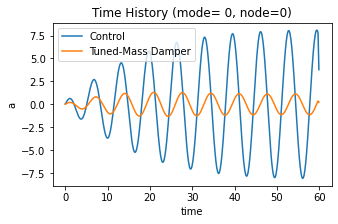

In [11]:
fig, ax = plt.subplots(figsize=(5,3))
ctrl.get_time_history_plt(ax)
tmd.get_time_history_plt(ax)
plt.legend()
plt.show()